In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data from the desired file
data1 = pd.read_csv('/content/drive/MyDrive/bank-additional/bank-additional-full.csv', sep=';')  # Replace with the desired file name

In [3]:
data1.shape

(41188, 21)

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
data1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
data1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
data1.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
NumericalCol = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
CategoricalCol = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

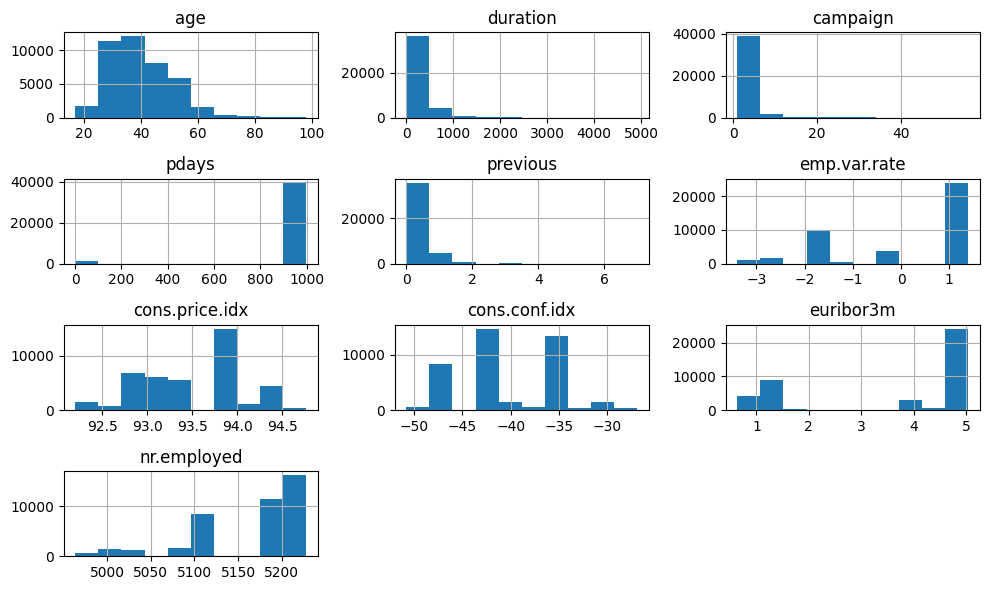

In [9]:
# Data distribution visualizations
data1[NumericalCol].hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

In [10]:
# Calculate skewness for each numerical column
skewness = data1[NumericalCol].skew()


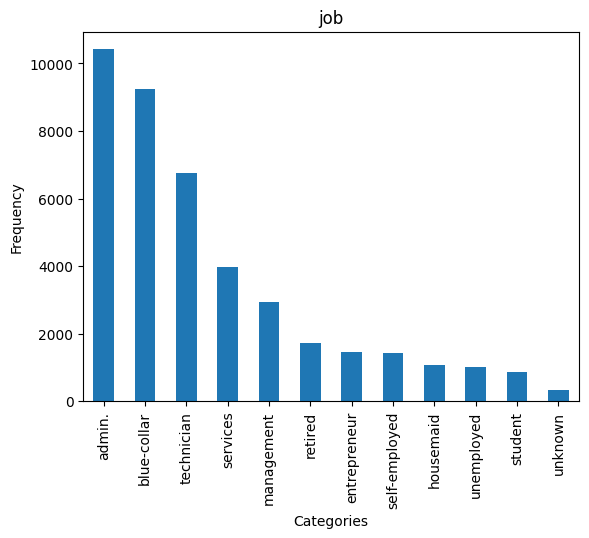

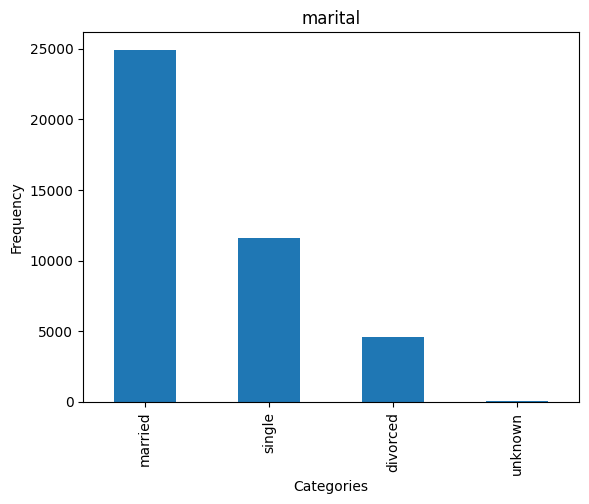

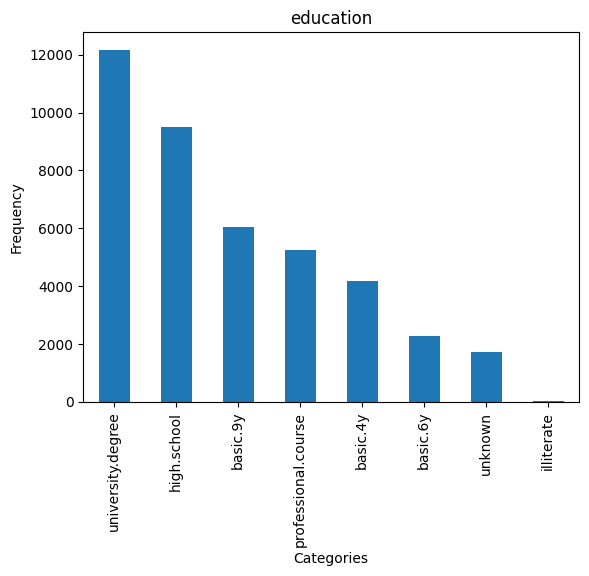

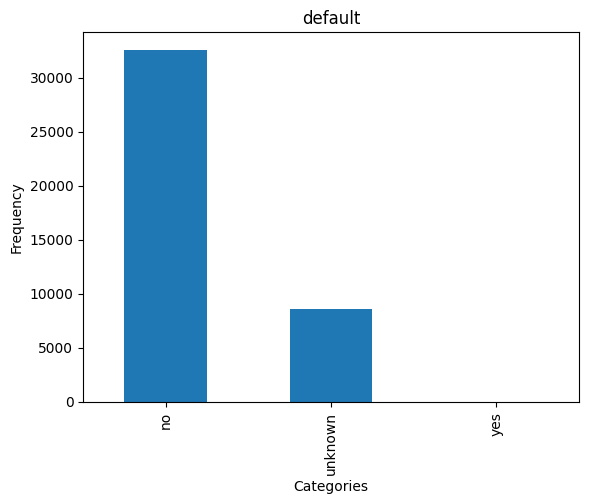

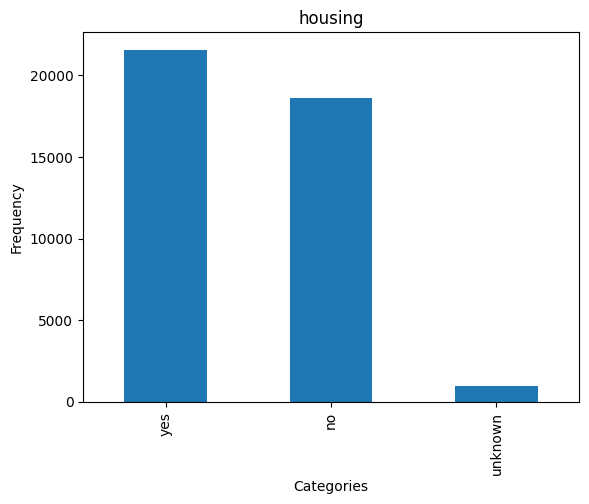

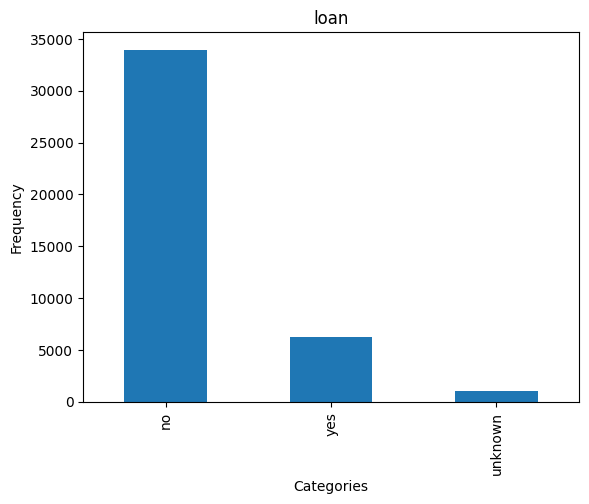

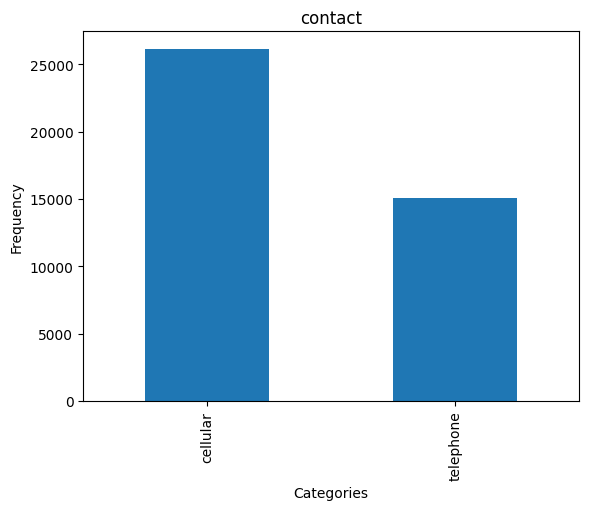

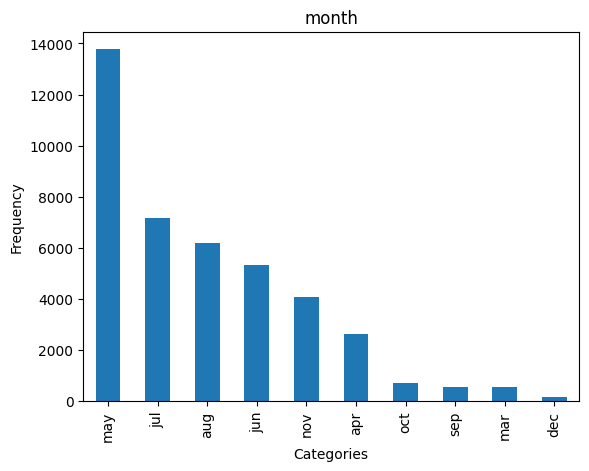

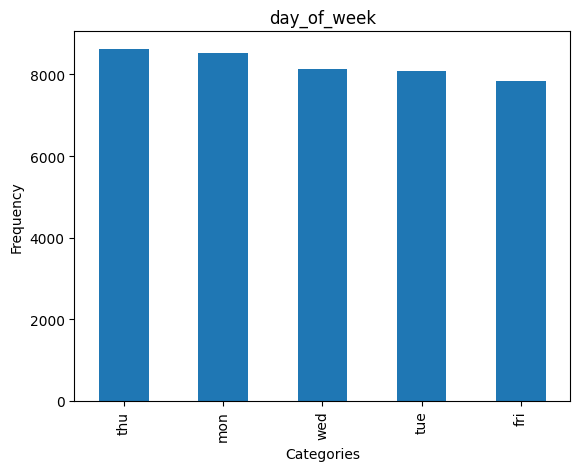

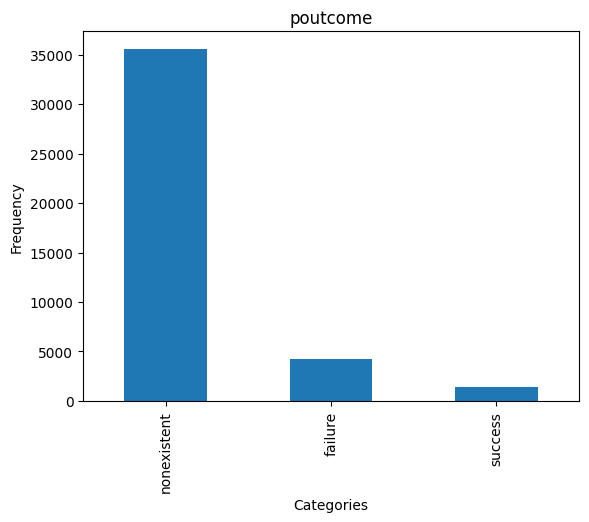

In [11]:
for column in CategoricalCol:
    data1[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.show()

<ipython-input-12-15156cede528>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data1.corr()


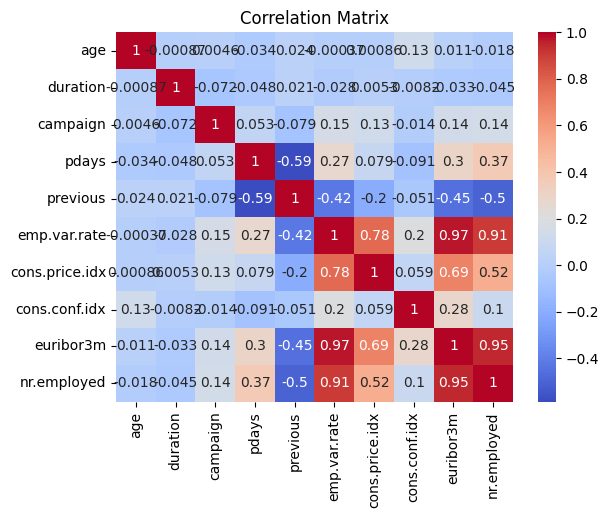

In [12]:
# Calculate the correlation matrix
corr_matrix = data1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

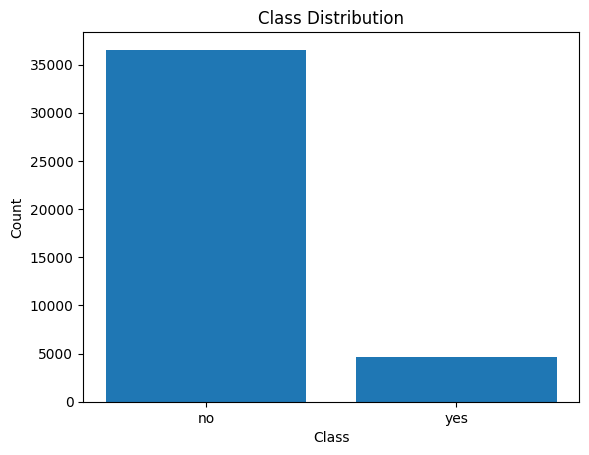

In [13]:
# Count the number of occurrences for each class
class_counts = data1['y'].value_counts()

# Plot the class distribution
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

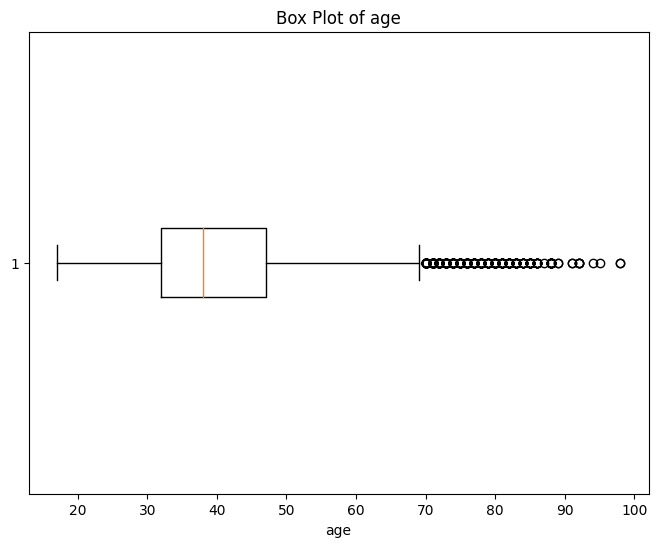

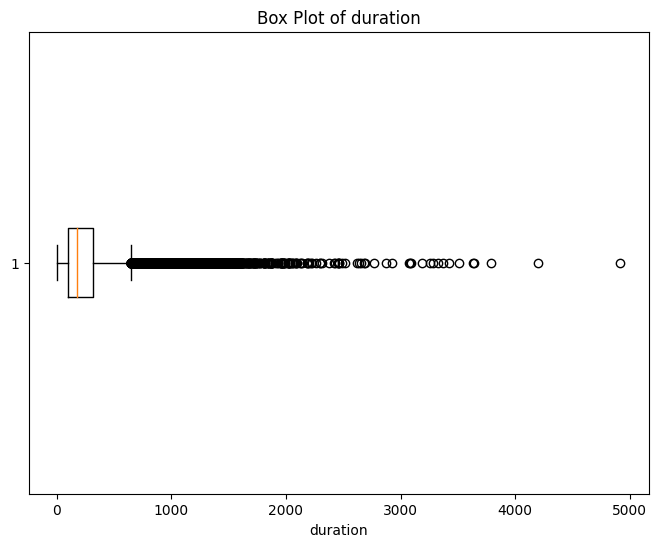

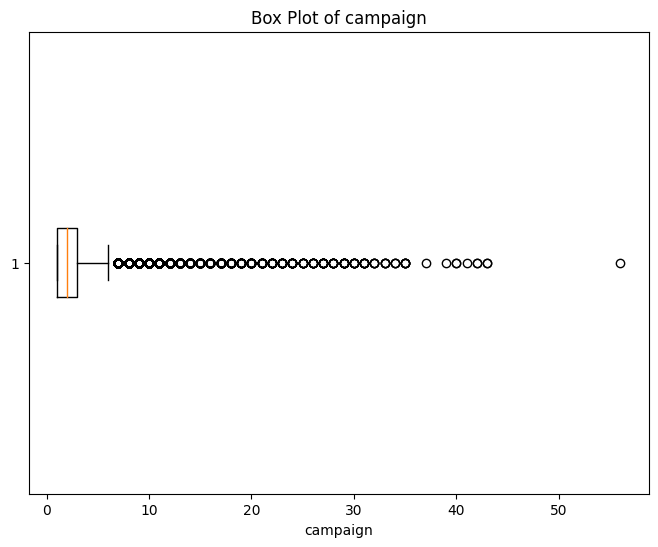

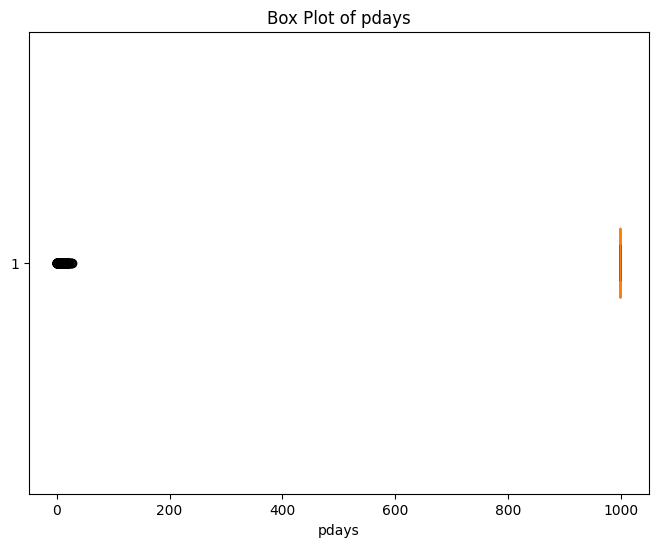

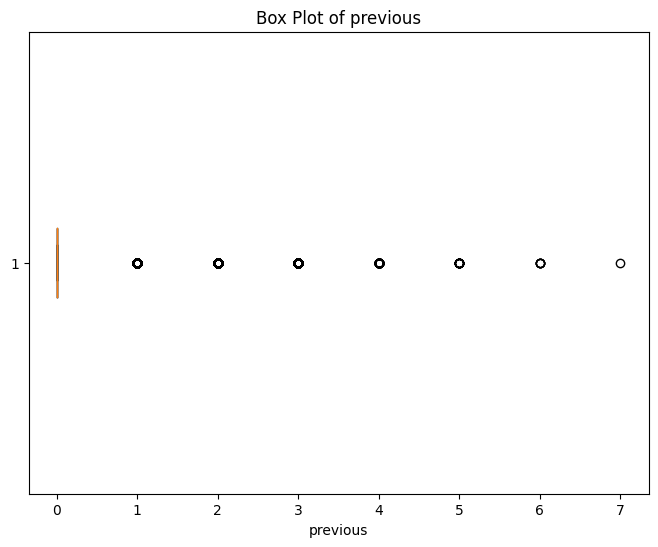

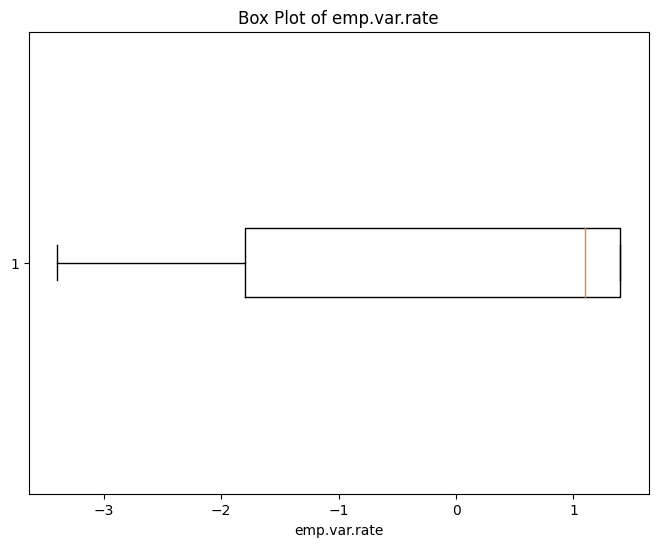

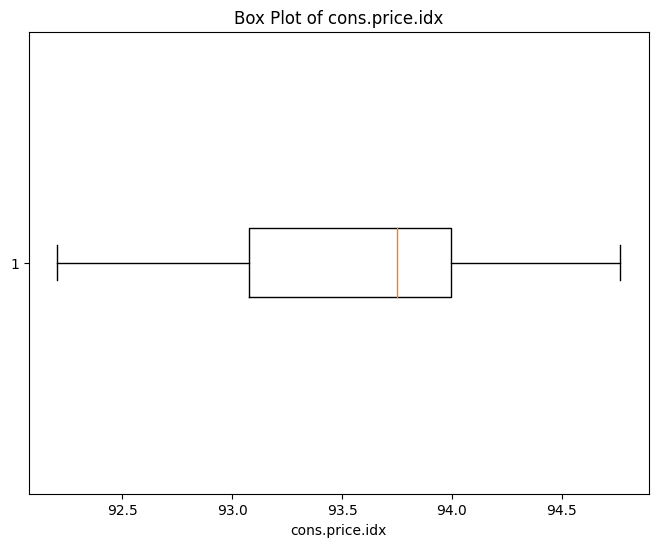

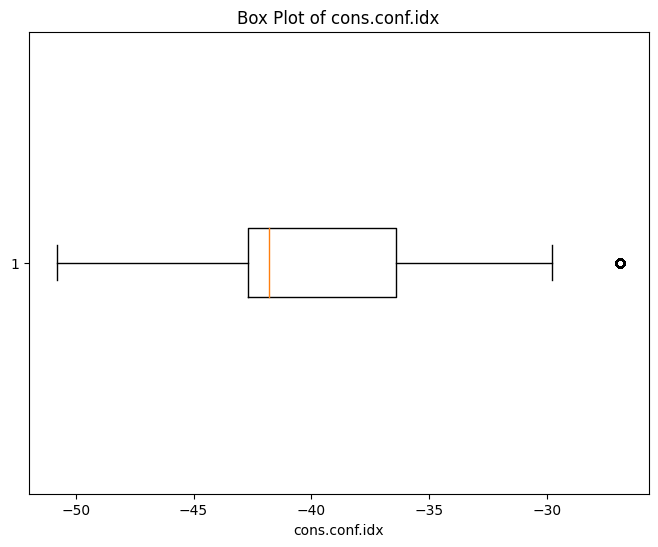

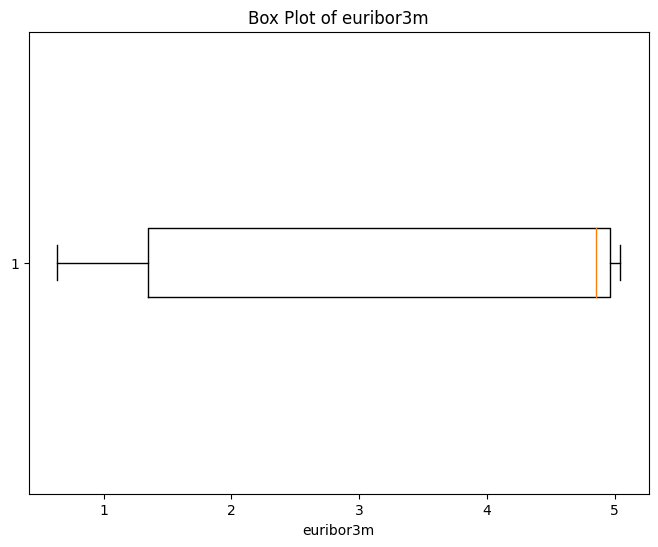

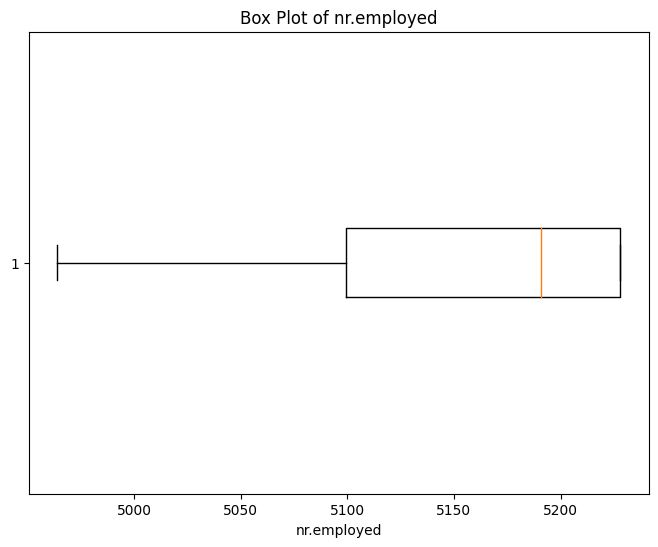

Number of outliers in age : 369
Number of outliers in duration : 861
Number of outliers in campaign : 869
Number of outliers in pdays : 1515
Number of outliers in previous : 1064
Number of outliers in emp.var.rate : 0
Number of outliers in cons.price.idx : 0
Number of outliers in cons.conf.idx : 0
Number of outliers in euribor3m : 0
Number of outliers in nr.employed : 0


In [14]:
# Define the threshold for outlier detection (e.g., z-score greater than 3)
threshold = 3

# Dictionary to store the number of outliers for each feature
outlier_counts1 = {}

# Loop through each numerical column
for column_name in NumericalCol:
    # Calculate the z-scores for the column
    z_scores1 = np.abs((data1[column_name] - data1[column_name].mean()) / data1[column_name].std())

    # Identify outliers
    outliers1 = data1[z_scores1 > threshold]

    # Count the number of outliers for the current feature
    num_outliers1 = len(outliers1)

    # Store the number of outliers in the dictionary
    outlier_counts1[column_name] = num_outliers1


    # Generate a box plot to visualize the distribution and potential outliers
    plt.figure(figsize=(8, 6))
    plt.boxplot(data1[column_name], vert=False)
    plt.title('Box Plot of ' + column_name)
    plt.xlabel(column_name)
    plt.show()


# Print the number of outliers for each feature
for column_name, num_outliers1 in outlier_counts1.items():
    print("Number of outliers in", column_name, ":", num_outliers1)


Bank-full Dataset

In [15]:
# Load the data from the desired file
data2 = pd.read_csv('/content/drive/MyDrive/bank/bank-full.csv', sep=';')  # Replace with the desired file name

In [16]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [17]:
data2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [18]:
data2.shape

(45211, 17)

In [19]:
data2.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [20]:
data2.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [21]:

NumericalCol = ['age', 'duration', 'campaign', 'pdays', 'previous', 'balance', 'day']
CategoricalCol = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

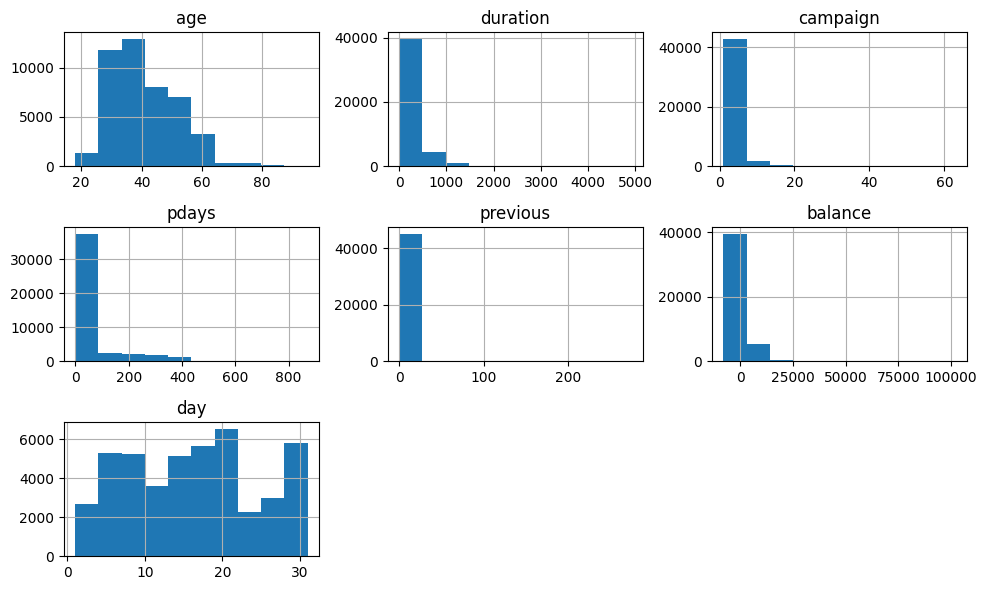

In [22]:
# Data distribution visualizations
data2[NumericalCol].hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

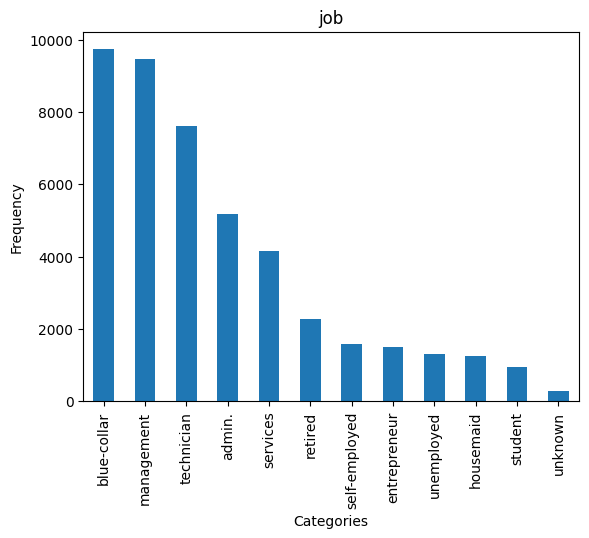

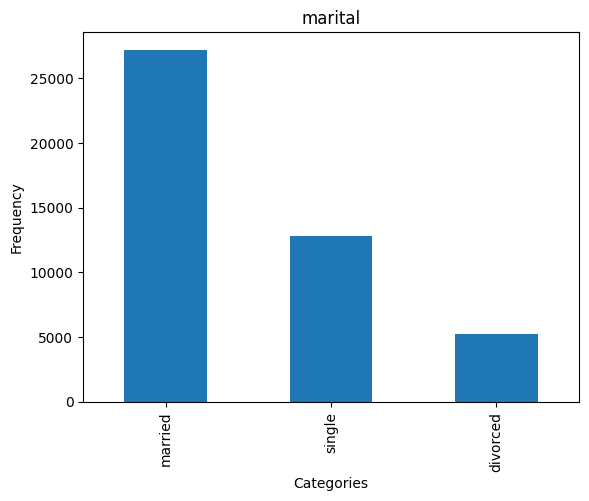

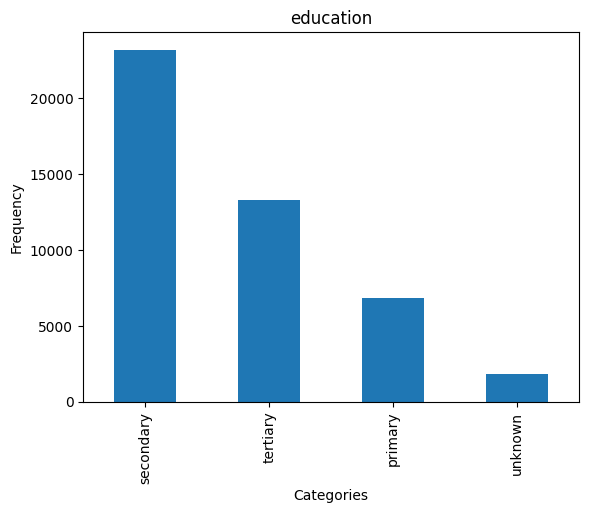

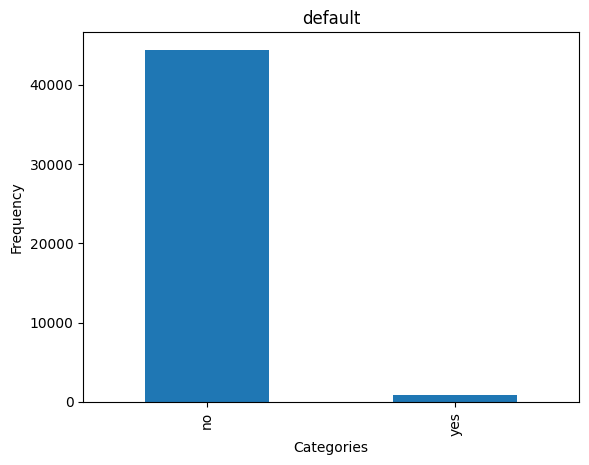

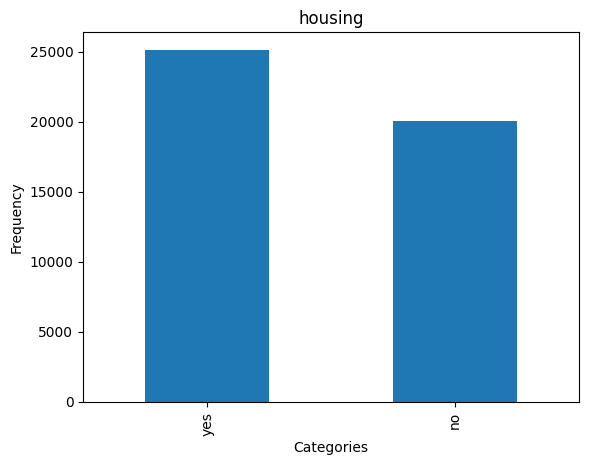

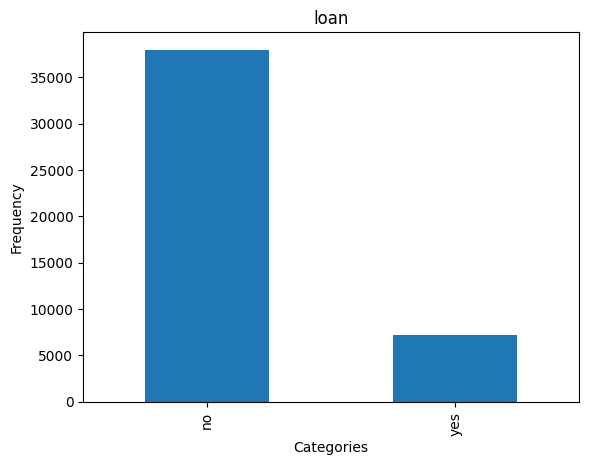

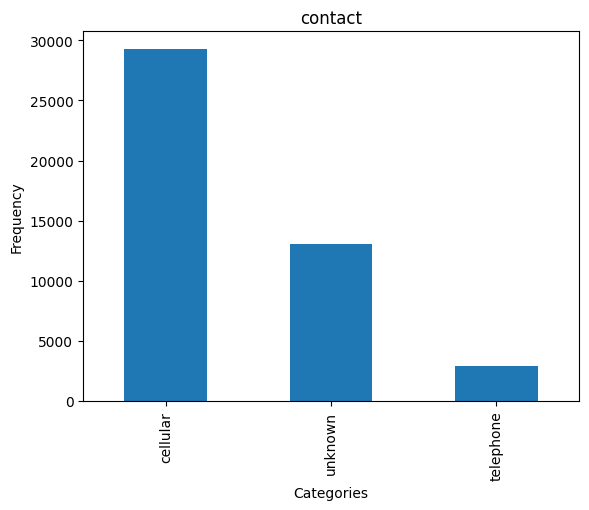

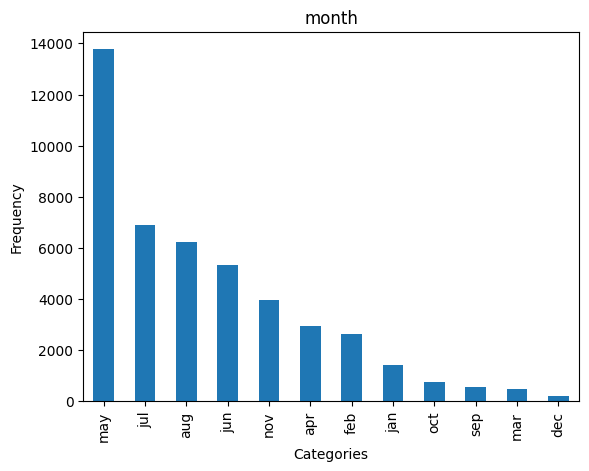

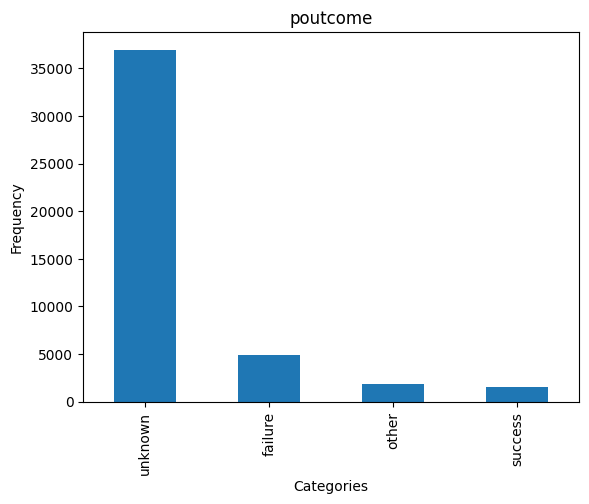

In [23]:
for column in CategoricalCol:
    data2[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.show()

<ipython-input-24-0ab6fa61b3aa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data2.corr()


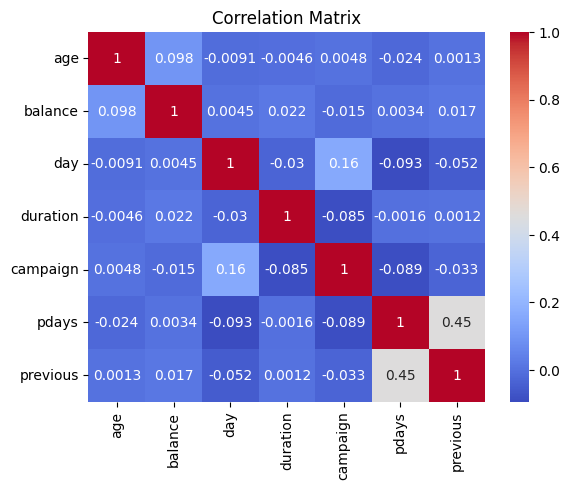

In [24]:
# Calculate the correlation matrix
corr_matrix = data2.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

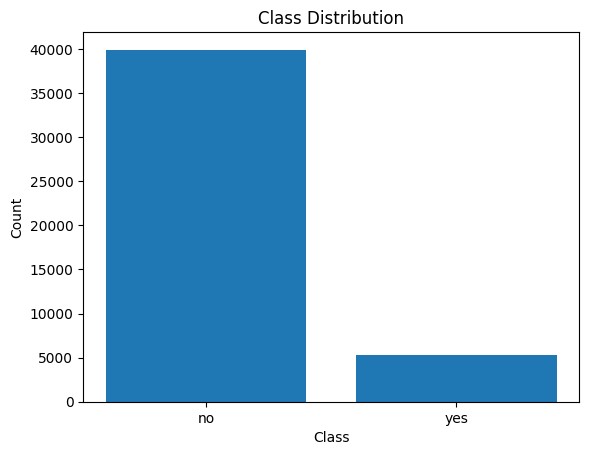

In [25]:
# Count the number of occurrences for each class
class_counts = data2['y'].value_counts()

# Plot the class distribution
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

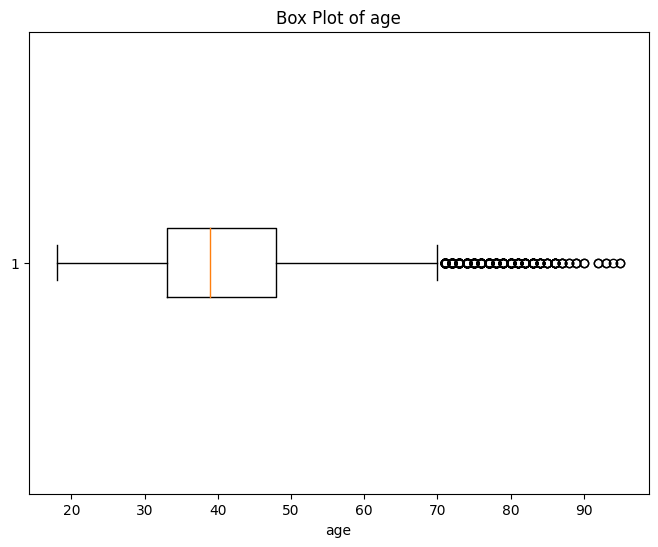

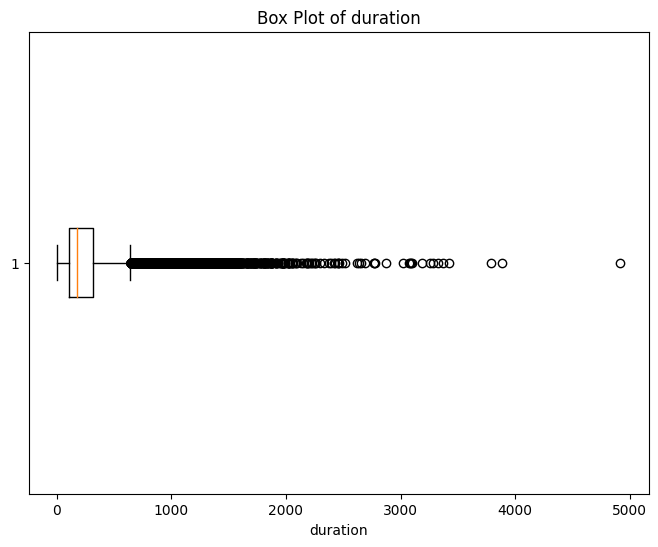

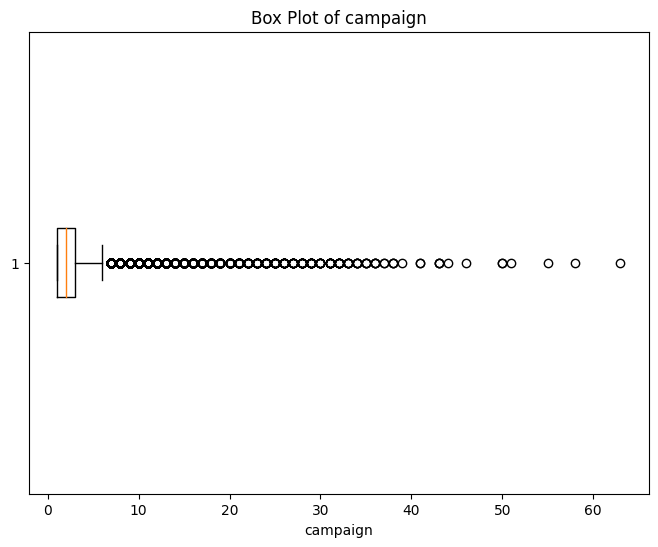

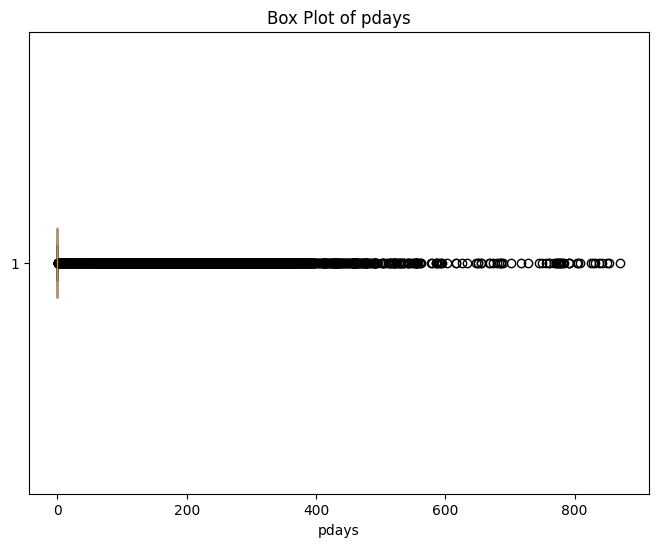

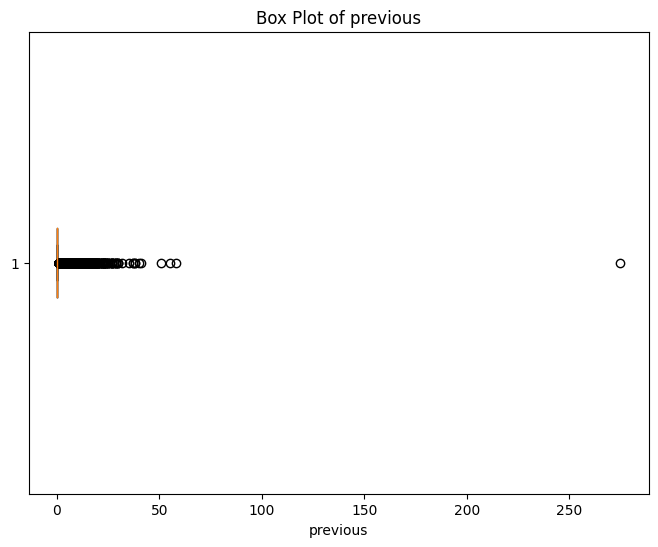

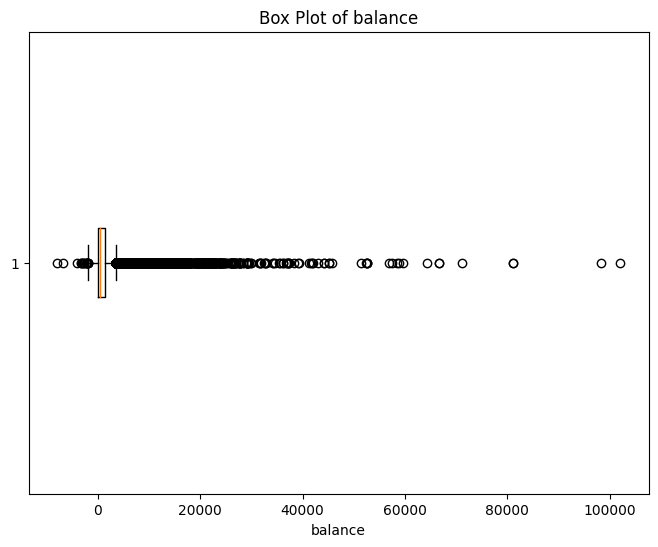

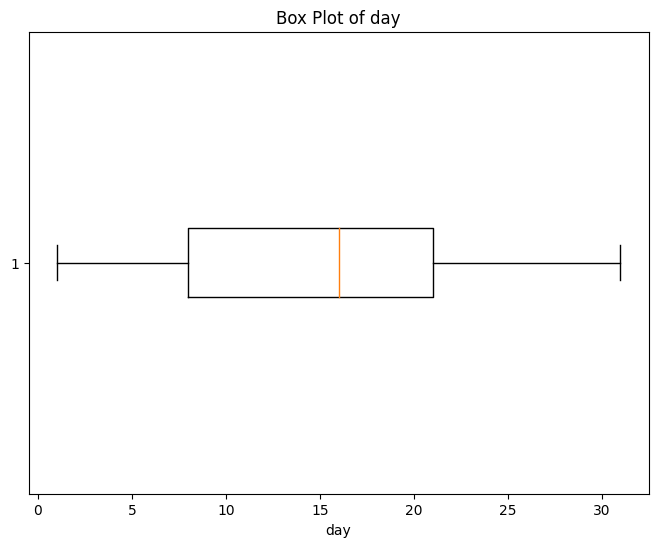

Number of outliers in age : 381
Number of outliers in duration : 963
Number of outliers in campaign : 840
Number of outliers in pdays : 1723
Number of outliers in previous : 582
Number of outliers in balance : 745
Number of outliers in day : 0


In [26]:
# Define the threshold for outlier detection (e.g., z-score greater than 3)
threshold = 3

# Dictionary to store the number of outliers for each feature
outlier_counts2 = {}

# Loop through each numerical column
for column_name in NumericalCol:
    # Calculate the z-scores for the column
    z_scores2 = np.abs((data2[column_name] - data2[column_name].mean()) / data2[column_name].std())

    # Identify outliers
    outliers2 = data2[z_scores2 > threshold]

    # Count the number of outliers for the current feature
    num_outliers2 = len(outliers2)

    # Store the number of outliers in the dictionary
    outlier_counts2[column_name] = num_outliers2


    # Generate a box plot to visualize the distribution and potential outliers
    plt.figure(figsize=(8, 6))
    plt.boxplot(data2[column_name], vert=False)
    plt.title('Box Plot of ' + column_name)
    plt.xlabel(column_name)
    plt.show()


# Print the number of outliers for each feature
for column_name, num_outliers2 in outlier_counts2.items():
    print("Number of outliers in", column_name, ":", num_outliers2)